## Loading the Library

In [1]:
require(twitteR)

Loading required package: twitteR
Warning message:
"package 'twitteR' was built under R version 3.5.2"

## Twitter API authentication

In [10]:
api_key <- "jZc0G65B6MORTqFZyXXlHc3Qt"
 
api_secret <- "TLDNDaDX9PzN5ThTYuiNH3fUb9LyCVeJTB0clI99vNrtkJx8OF"
 
access_token <- "894046754278002690-FWNtGVKuJklyUzZCl2B7pLA9ZNEWbPE"
 
access_token_secret <- "jrzhd3SbikFBqIYtP5gkarb9KMBFvsJBRxGl0Cq7krC9p"

setup_twitter_oauth(api_key, api_secret, access_token, access_token_secret)

[1] "Using direct authentication"


## Getting tweets related to the query

In [11]:
query = 'narendramodi'
# Getting a number of 100 tweets of the queried user handle which in this case is narendramodi
tweets = userTimeline(query , n = 100)

## Converting the tweets to a dataframe object

In [12]:
tweetsDF = twListToDF(tweets)
tail(tweetsDF)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
94,"The great Odia culture always gives topmost importance to women empowerment. However, the current Government in O… https://t.co/cn7xSsX5Nk",FALSE,8874,NA,2019-01-05 15:21:46,TRUE,NA,1081571465651195904,NA,"<a href=""https://studio.twitter.com"" rel=""nofollow"">Twitter Media Studio</a>",narendramodi,2219,FALSE,FALSE,NA,NA
95,"From Baripada in Odisha, here is how we paid tributes to the phenomenal men and women who fought valiantly for Indi… https://t.co/IXT61oDA2P",FALSE,6977,NA,2019-01-05 15:21:00,TRUE,NA,1081571272902041605,NA,"<a href=""https://studio.twitter.com"" rel=""nofollow"">Twitter Media Studio</a>",narendramodi,1807,FALSE,FALSE,NA,NA
96,"<U+0939><U+092E><U+093E><U+0930><U+0947> <U+0932><U+093F><U+090F> <U+0915><U+093F><U+0938><U+093E><U+0928> <U+0905><U+0928><U+094D><U+0928><U+0926><U+093E><U+0924><U+093E> <U+0939><U+0948><U+0902>, <U+0909><U+0928><U+0915><U+0947> <U+0932><U+093F><U+090F> <U+0935><U+094B><U+091F><U+092C><U+0948><U+0902><U+0915><U+0964> <U+091C><U+092C> <U+0915><U+093F><U+0938><U+093E><U+0928><U+094B><U+0902> <U+0915><U+094B> <U+0915><U+094B><U+0908> <U+0938><U+093F><U+0930><U+094D><U+092B> <U+0935><U+094B><U+091F><U+092C><U+0948><U+0902><U+0915> <U+0938><U+092E><U+091D><U+0924><U+093E> <U+0939><U+0948> <U+0924><U+092C> <U+0935><U+094B> <U+0906><U+0927><U+0940>-<U+0905><U+0927><U+0942><U+0930><U+0940> <U+0915><U+0930><U+094D><U+091C><U+092E><U+093E><U+092B><U+0940>… https://t.co/rMqHno0mri",FALSE,27463,NA,2019-01-05 13:43:44,TRUE,NA,1081546795858112512,NA,"<a href=""https://studio.twitter.com"" rel=""nofollow"">Twitter Media Studio</a>",narendramodi,6185,FALSE,FALSE,NA,NA
97,<U+091C><U+092C> <U+0938><U+0930><U+0915><U+093E><U+0930> <U+092C><U+093F><U+0928><U+093E> <U+092D><U+094D><U+0930><U+0937><U+094D><U+091F><U+093E><U+091A><U+093E><U+0930> <U+0915><U+0947> <U+0938><U+093E><U+092B> <U+0928><U+0940><U+092F><U+0924> <U+0938><U+0947> <U+0915><U+093E><U+092E> <U+0915><U+0930><U+0924><U+0940> <U+0939><U+0948> <U+0924><U+094B> <U+092A><U+0930><U+093F><U+0923><U+093E><U+092E> <U+0926><U+093F><U+0916><U+0924><U+093E> <U+0939><U+0948><U+0964> <U+090F><U+0915> <U+0938><U+093F><U+0902><U+091A><U+093E><U+0908> <U+092A><U+0930><U+093F><U+092F><U+094B><U+091C><U+0928><U+093E> <U+091C><U+093F><U+0938><U+0947> <U+0926><U+0936><U+0915><U+094B><U+0902> <U+092A><U+0939><U+0932><U+0947> <U+092A><U+0942><U+0930><U+093E> <U+0939><U+094B>… https://t.co/l4ihrVjx6z,FALSE,16022,NA,2019-01-05 13:37:49,TRUE,NA,1081545303465979904,NA,"<a href=""https://studio.twitter.com"" rel=""nofollow"">Twitter Media Studio</a>",narendramodi,3912,FALSE,FALSE,NA,NA
98,"We have transformed the housing sector. More houses are being built with better facilities, allocated without favou… https://t.co/ZoJJgbSlYk",FALSE,8566,NA,2019-01-05 13:34:57,TRUE,NA,1081544584482549760,NA,"<a href=""https://studio.twitter.com"" rel=""nofollow"">Twitter Media Studio</a>",narendramodi,2227,FALSE,FALSE,NA,NA
99,Odisha supports BJP’s development agenda. Speaking at a huge rally in Baripada. Watch. https://t.co/70ixYEncUD,FALSE,11081,NA,2019-01-05 10:32:05,FALSE,NA,1081498562272227328,NA,"<a href=""https://periscope.tv"" rel=""nofollow"">Periscope</a>",narendramodi,2576,FALSE,FALSE,NA,NA


## Text Cleaning

In [13]:
require(tm)
require(wordcloud)

## Building corpus and setting source to be character vectors and do further pre-processing

In [14]:
corpus = Corpus(VectorSource(tweetsDF$text))

removeURL = function(text) gsub('http[^[:space:]]*' , '' , text)

corpus = tm_map(corpus , tolower)
corpus = tm_map(corpus , removePunctuation)
corpus = tm_map(corpus , removeURL)
corpus = tm_map(corpus , removeWords, stopwords("english"))
corpus = tm_map(corpus , stripWhitespace)

Warning message in tm_map.SimpleCorpus(corpus, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeURL):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
"transformation drops documents"

## Converting the corpus to a matrix and sorting the words w.r.t their frequencies

In [15]:
mine = TermDocumentMatrix(corpus)
mine_matrix = as.matrix(mine)
datavector = sort(rowSums(mine_matrix) , decreasing = TRUE)
frequencyDF = data.frame(word = names(datavector) , freq = datavector)

In [16]:
head(frequencyDF , 10)

,word,freq
…,…,18
bjp,bjp,12
will,will,11
development,development,9
watch,watch,9
के,<U+0915><U+0947>,8
one,one,7
है,<U+0939><U+0948>,7
addressing,addressing,6
में,<U+092E><U+0947><U+0902>,6


## Creating a wordcloud

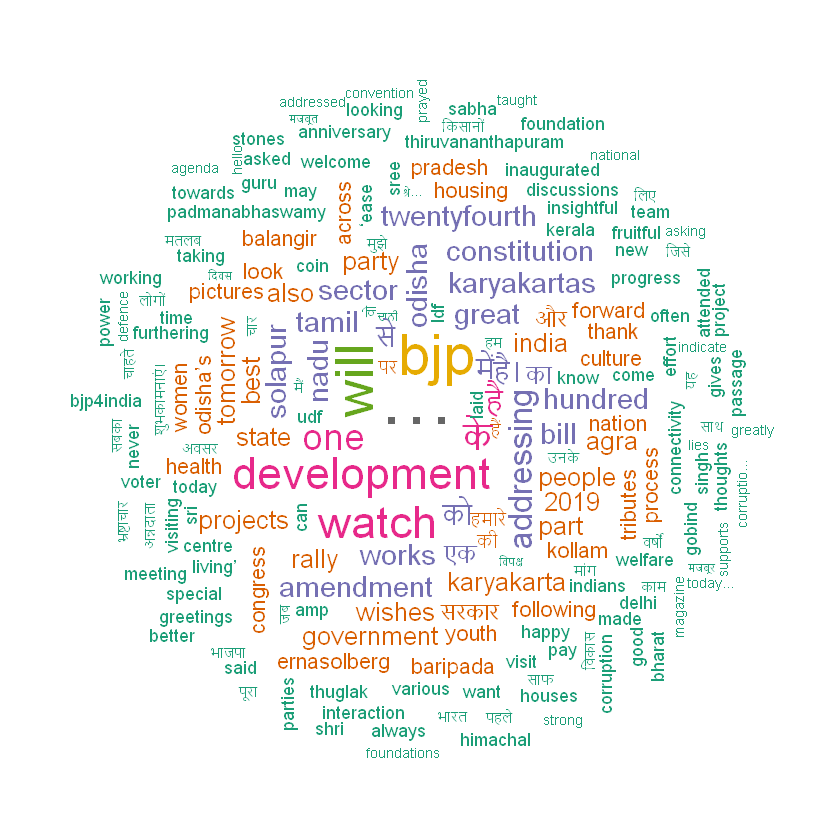

In [17]:
# set.seed(1234)
wordcloud(words = frequencyDF$word , freq = frequencyDF$freq , min.freq = 1,
          max.words = 200, random.order = FALSE, rot.per = 0.25, 
          colors = brewer.pal(8 , "Dark2"))